# Clase 6, usando datos de acciones

Vamos a aprender a descargar datos historicos dela bolsa de valores y aplicar los conceptos que hemos visto 

- Leer archivos CSV
- Descargar datos historicos
- Obtener estadísticos básicos

In [1]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

## Obtener datos diarios, tesla y apple

In [4]:
tickers = ['AAPL', 'AMZN', 'GOOGL', 'COST', 'MSFT', 
           'BRK-A', 'NVDA', 'NFLX', 'WMT', 'V', 
           'JPM', 'XOM', 'MA', 'TSLA', 'PEP', 'PG']
start_date = '2017-01-01'
end_date = '2023-12-31'
df = yf.download(tickers, start=start_date, end=end_date)['Close']
rt = df.pct_change()

[*********************100%%**********************]  16 of 16 completed


In [8]:
df = pd.DataFrame({
    'vol' : rt.std() * np.sqrt(252),
    'rend' : rt.mean() * 252
})

In [13]:
df

,vol,rend
AAPL,0.300911,0.316421
AMZN,0.336948,0.256470
BRK-B,0.207233,0.132955
COST,0.229505,0.229754
GOOGL,0.294806,0.221293
JPM,0.289255,0.137406
MA,0.292905,0.243113
MSFT,0.284624,0.297523
NFLX,0.440711,0.291784
NVDA,0.499218,0.549580


Text(0, 0.5, 'Rendimiento')

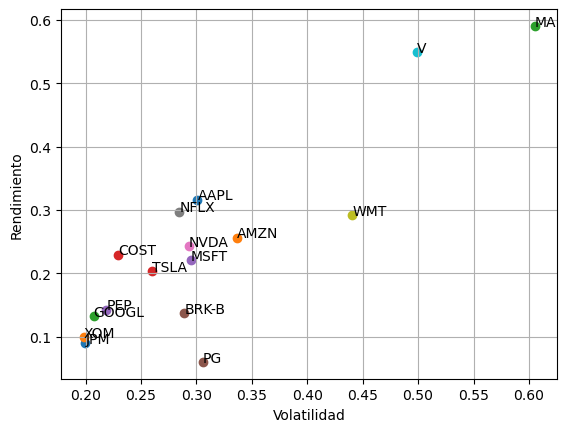

In [16]:
# Grafica las acciones
for i in range(len(df)):
    flag = df.iloc[i]
    plt.scatter(flag.vol, flag.rend)
    plt.text(flag.vol, flag.rend, tickers[i])
plt.grid()
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')

### Obtenga la regresión lineal usando sklearn 

In [17]:
from sklearn.linear_model import LinearRegression

Si modelamos la relacion entre volatilidad y riesgo de forma lineal, tenemos la siguiente ecuación:

$E[x] = \theta_0 + \theta_1 \sigma $

In [18]:
X = df[['vol']]
y = df[['rend']]

model = LinearRegression().fit(X,y)

In [19]:
# ¿Cuál es el intercepto? Cuando volatilidad es 0, entonces debe ser igual a cetes de EUA
model.intercept_

array([-0.11681201])

In [20]:
# ¿Cuál es el coeficiente? Rendimiento aumenta 1.15 por cada
model.coef_

array([[1.15447298]])

Escriba la ecuación del modelo

$$Rendimiento = -0.11 + 1.15 * volatilidad$$

Grafique el modelo con la gráfica anterior

In [21]:
df['predicciones']= model.predict(X)

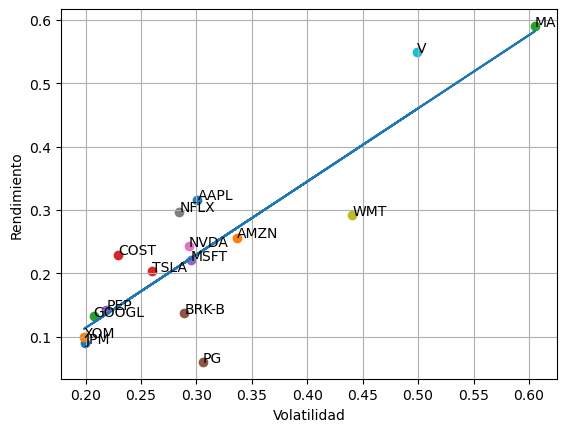

In [22]:
# Grafica las acciones
for i in range(len(df)):
    flag = df.iloc[i]
    plt.scatter(flag.vol, flag.rend)
    plt.text(flag.vol, flag.rend, tickers[i])
plt.grid()
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.plot(df.vol, df.predicciones)

¿A mayor volatilidad, mayor rendimiento esperado?

Más volatilidad es más rendimiento porque lo más riesgoso es más barato.